In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [3]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [4]:
G.add_node(H)

In [5]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [6]:
print(*e)

2 3


In [7]:
G.add_edges_from([(1, 2), (1, 3)])

In [8]:
G.add_edges_from(H.edges)

In [9]:
G.number_of_nodes()

11

In [10]:
G.number_of_edges()

10

In [11]:
list(G.nodes)

[1,
 2,
 3,
 4,
 5,
 0,
 6,
 7,
 8,
 9,

In [12]:
import matplotlib.pyplot as plt

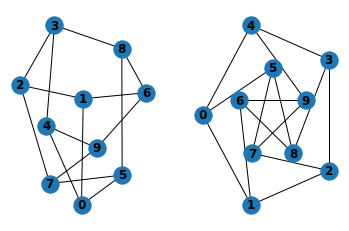

In [13]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

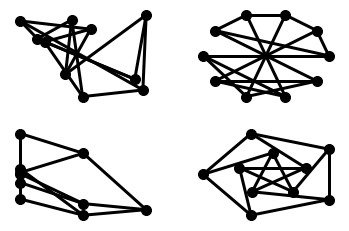

In [14]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

In [15]:
import json
with open("gui/src/pages/Dashboard/authors_global.json") as json_file:
    d = json.load(json_file)
    print(d[0].keys())

dict_keys(['_id', 'authors_list', 'array', 'graph_data'])


In [16]:
d = json.dumps(nx.node_link_data(G))

In [17]:
print(d)

{"directed": false, "multigraph": false, "graph": {"name": "Petersen Graph"}, "nodes": [{"id": 0}, {"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}, {"id": 8}, {"id": 9}], "links": [{"source": 0, "target": 1}, {"source": 0, "target": 4}, {"source": 0, "target": 5}, {"source": 1, "target": 2}, {"source": 1, "target": 6}, {"source": 2, "target": 3}, {"source": 2, "target": 7}, {"source": 3, "target": 4}, {"source": 3, "target": 8}, {"source": 4, "target": 9}, {"source": 5, "target": 7}, {"source": 5, "target": 8}, {"source": 6, "target": 8}, {"source": 6, "target": 9}, {"source": 7, "target": 9}]}


In [18]:
json_file = open("gui/src/pages/Dashboard/authors_global.json")

In [19]:
graph_data = json.load(json_file)[0]['graph_data']

In [20]:
data = {
    "directed": False, 
    "multigraph": False, 
    "graph": {"name": "Petersen Graph"}, 
    "nodes": graph_data['nodes'],
    "links": graph_data['links']
}

In [21]:
H = nx.node_link_graph(data)

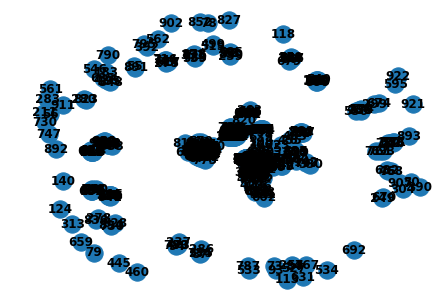

In [22]:
nx.draw(H, with_labels=True, font_weight='bold')

In [23]:
nx.write_graph6(H, 'authors_global.g6')

In [24]:
class CustomBaseException(Exception):
    pass

class InvalidFieldLength(CustomBaseException):
    """Exception to control invalid field length in forms"""

    def __init__(self) -> None:
        """Constructor"""
        msg = "Exception - Invalid field length in form"
        super(InvalidFieldLength, self).__init__(msg)

def validate_field_length(
    field: str, limit: int, is_greater_than_limit: bool = False
) -> bool:
    """
    if is_greater_than_limit equals True,
    it means we are checking if field > limit
    """
    if field is None or ((len(field) > limit) != is_greater_than_limit):
        raise InvalidFieldLength()
    return True

In [25]:
validate_field_length("", 2000)

True

In [26]:
class InvalidField(CustomBaseException):
    """Exception to control invalid fields in forms"""

    def __init__(self, field: str = "field") -> None:
        """Constructor"""
        msg = f"Exception - Invalid {field} in form"
        super(InvalidField, self).__init__(msg)

def validate_alphanumeric_field(field: str) -> bool:
    """Optional whitespace separated string, with alphanumeric characters."""
    is_alnum = field and all(word.isalnum() for word in field.split())
    if is_alnum or field == "-":
        return True
    raise InvalidField()

In [27]:
car = "abcdad"
validate_alphanumeric_field(car)

True

In [28]:
rm_preferences = ["DAILY_DIGEST", "ROOT_MOVED", "FILE_UPLOADED", "ROOT_UPDATE"]
email = [
        "ACCESS_GRANTED",
        "AGENT_TOKEN",
        "CHARTS_REPORT",
        "EVENT_REPORT",
        "FILE_UPDATE",
        "GROUP_INFORMATION",
        "GROUP_REPORT",
        "NEW_COMMENT",
        "NEW_DRAFT",
        "PORTFOLIO_UPDATE",
        "REMEDIATE_FINDING",
        "REMINDER_NOTIFICATION",
        "ROOT_UPDATE",
        "SERVICE_UPDATE",
        "UNSUBSCRIPTION_ALERT",
        "UPDATED_TREATMENT",
        "VULNERABILITY_ASSIGNED",
        "VULNERABILITY_REPORT",
    ]

if (any(item in email for item in rm_preferences)):
    print("True")
    print(type(email))

#email = list(set(email).difference(set(rm_preferences)))
# type(email)

True
<class 'list'>


In [29]:
new_preferences = [
            item
            for item in email
            if item not in rm_preferences
        ]
# new_preferences

# call G6 file

In [30]:
graph = nx.read_graph6("authors_global.g6")

# Print graph

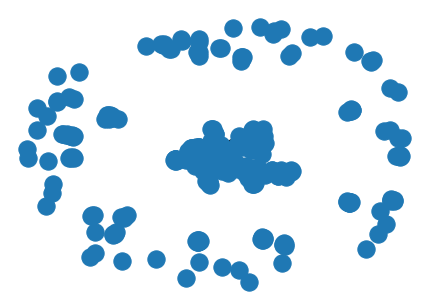

In [31]:
nx.draw(graph)

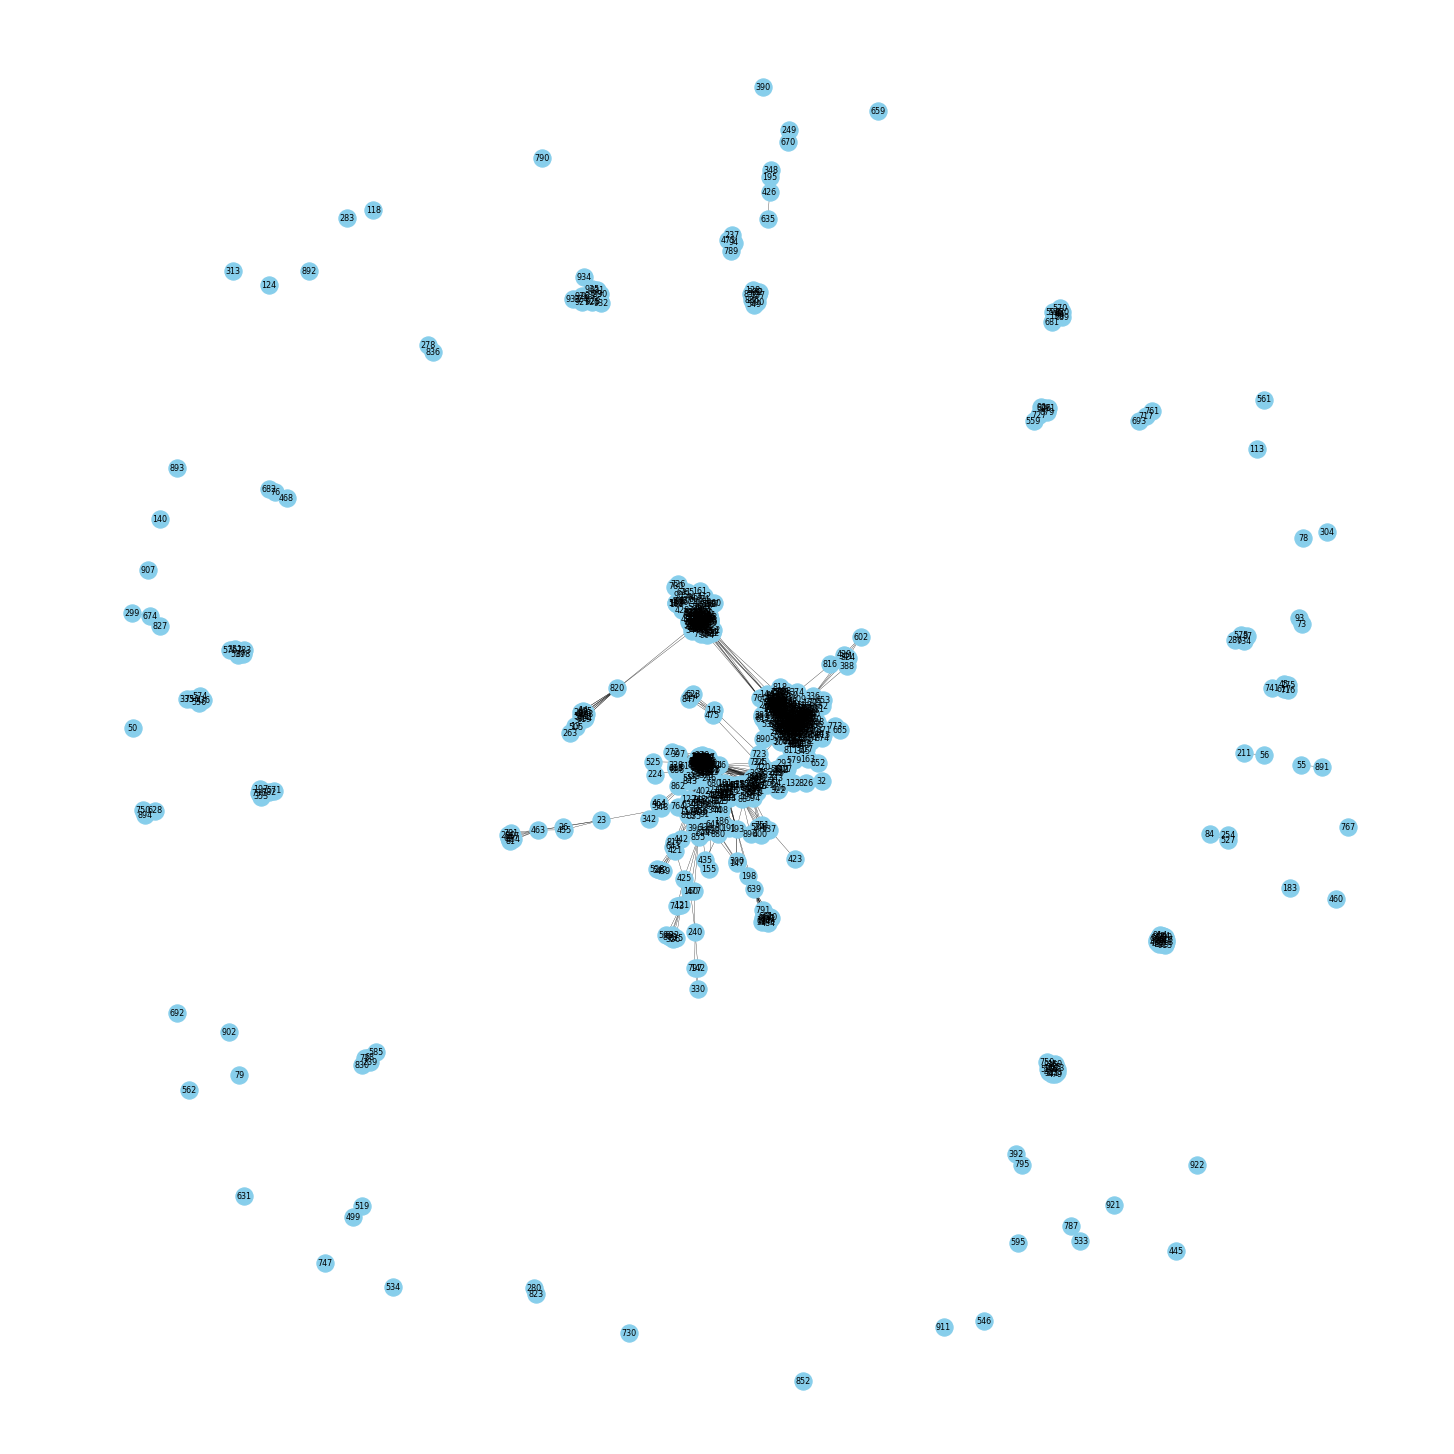

In [32]:
plt.figure(figsize=(20,20))
nx.draw(graph, with_labels=True, node_color='skyblue', width=.3, font_size=8)

In [33]:
degrees : list = nx.degree_histogram(graph)
degrees.sort()
print(degrees)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 13, 13, 13, 14, 15, 23, 23, 24, 25, 27, 29, 30, 31, 35, 41, 46]


In [34]:
nx.degree(graph)

DegreeView({0: 94, 1: 83, 2: 12, 3: 29, 4: 44, 5: 57, 6: 21, 7: 21, 8: 38, 9: 54, 10: 11, 11: 18, 12: 66, 13: 11, 14: 11, 15: 42, 16: 86, 17: 78, 18: 28, 19: 29, 20: 44, 21: 58, 22: 31, 23: 4, 24: 6, 25: 125, 26: 3, 27: 14, 28: 40, 29: 62, 30: 16, 31: 16, 32: 2, 33: 10, 34: 70, 35: 86, 36: 37, 37: 11, 38: 113, 39: 109, 40: 19, 41: 11, 42: 11, 43: 61, 44: 7, 45: 4, 46: 10, 47: 132, 48: 10, 49: 58, 50: 0, 51: 100, 52: 27, 53: 8, 54: 113, 55: 1, 56: 1, 57: 58, 58: 31, 59: 26, 60: 60, 61: 19, 62: 7, 63: 48, 64: 110, 65: 109, 66: 134, 67: 23, 68: 4, 69: 6, 70: 19, 71: 137, 72: 4, 73: 1, 74: 104, 75: 104, 76: 2, 77: 119, 78: 0, 79: 0, 80: 3, 81: 6, 82: 133, 83: 25, 84: 2, 85: 91, 86: 132, 87: 3, 88: 33, 89: 63, 90: 5, 91: 3, 92: 11, 93: 1, 94: 3, 95: 131, 96: 21, 97: 48, 98: 51, 99: 38, 100: 35, 101: 22, 102: 74, 103: 41, 104: 66, 105: 20, 106: 66, 107: 33, 108: 32, 109: 132, 110: 31, 111: 35, 112: 87, 113: 0, 114: 13, 115: 10, 116: 87, 117: 115, 118: 0, 119: 15, 120: 44, 121: 9, 122: 8, 123

# Validacion de un dato

In [35]:
author = list(filter(lambda x: x["name"] == "Zhang", graph_data['nodes']))
author

[{'id': '895', 'name': 'Zhang', 'works': 80}]

In [36]:
links = list(filter(lambda x: x["source"] == "895" or x["target"] == "895", graph_data['links']))
print(links)

[{'source': '36', 'target': '895', 'related': 1}, {'source': '60', 'target': '895', 'related': 4}, {'source': '67', 'target': '895', 'related': 1}, {'source': '70', 'target': '895', 'related': 1}, {'source': '89', 'target': '895', 'related': 5}, {'source': '120', 'target': '895', 'related': 2}, {'source': '125', 'target': '895', 'related': 3}, {'source': '126', 'target': '895', 'related': 7}, {'source': '129', 'target': '895', 'related': 10}, {'source': '131', 'target': '895', 'related': 7}, {'source': '134', 'target': '895', 'related': 2}, {'source': '135', 'target': '895', 'related': 4}, {'source': '139', 'target': '895', 'related': 2}, {'source': '158', 'target': '895', 'related': 1}, {'source': '188', 'target': '895', 'related': 1}, {'source': '201', 'target': '895', 'related': 3}, {'source': '202', 'target': '895', 'related': 2}, {'source': '218', 'target': '895', 'related': 1}, {'source': '221', 'target': '895', 'related': 1}, {'source': '238', 'target': '895', 'related': 1}, {'s

In [37]:
len(links)

87

# crear dataframe y hacer grafico de grados


In [38]:
import pandas as pd
degrees = dict(nx.degree(graph))
nx.set_node_attributes(graph, name='degree', values=degrees)
degree_df = pd.DataFrame(graph.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
774,774,172
130,130,138
71,71,137
458,458,136
710,710,135
...,...,...
534,534,0
827,827,0
911,911,0
790,790,0


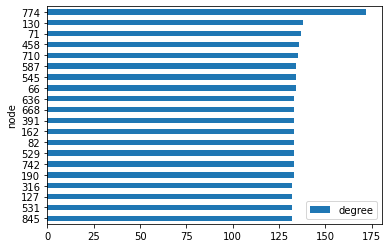

In [39]:
degree_df[0:20].plot(x='node', y='degree', kind='barh').invert_yaxis()

# crear grafico considerando los trabajos relacionados

In [40]:
print(graph_data["nodes"][0])
print(graph_data["links"][0])
nx.degree(graph, weight = "related")

{'id': '0', 'name': '', 'works': 15}
{'source': '0', 'target': '25', 'related': 1}


DegreeView({0: 94, 1: 83, 2: 12, 3: 29, 4: 44, 5: 57, 6: 21, 7: 21, 8: 38, 9: 54, 10: 11, 11: 18, 12: 66, 13: 11, 14: 11, 15: 42, 16: 86, 17: 78, 18: 28, 19: 29, 20: 44, 21: 58, 22: 31, 23: 4, 24: 6, 25: 125, 26: 3, 27: 14, 28: 40, 29: 62, 30: 16, 31: 16, 32: 2, 33: 10, 34: 70, 35: 86, 36: 37, 37: 11, 38: 113, 39: 109, 40: 19, 41: 11, 42: 11, 43: 61, 44: 7, 45: 4, 46: 10, 47: 132, 48: 10, 49: 58, 50: 0, 51: 100, 52: 27, 53: 8, 54: 113, 55: 1, 56: 1, 57: 58, 58: 31, 59: 26, 60: 60, 61: 19, 62: 7, 63: 48, 64: 110, 65: 109, 66: 134, 67: 23, 68: 4, 69: 6, 70: 19, 71: 137, 72: 4, 73: 1, 74: 104, 75: 104, 76: 2, 77: 119, 78: 0, 79: 0, 80: 3, 81: 6, 82: 133, 83: 25, 84: 2, 85: 91, 86: 132, 87: 3, 88: 33, 89: 63, 90: 5, 91: 3, 92: 11, 93: 1, 94: 3, 95: 131, 96: 21, 97: 48, 98: 51, 99: 38, 100: 35, 101: 22, 102: 74, 103: 41, 104: 66, 105: 20, 106: 66, 107: 33, 108: 32, 109: 132, 110: 31, 111: 35, 112: 87, 113: 0, 114: 13, 115: 10, 116: 87, 117: 115, 118: 0, 119: 15, 120: 44, 121: 9, 122: 8, 123

# Betweenness centrality 

Is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.

The algorithm calculates unweighted shortest paths between all pairs of nodes in a graph. Each node receives a score, based on the number of shortest paths that pass through the node. Nodes that more frequently lie on shortest paths between other nodes will have higher betweenness centrality scores.

In [41]:
nx.betweenness_centrality(graph)

{0: 3.4219926786073794e-05,
 1: 0.002094092480274437,
 2: 2.8213938224879104e-05,
 3: 2.3211446393027796e-05,
 4: 0.0004565481529113178,
 5: 0.0018091012373265196,
 6: 3.672831265112123e-05,
 7: 0.00010864541019752799,
 8: 0.00021384577765212818,
 9: 0.0004502696874082089,
 10: 0.0,
 11: 0.00013353023881102578,
 12: 0.0014051308732256575,
 13: 2.2138503055495123e-06,
 14: 0.00022110511844735553,
 15: 4.31474932455986e-05,
 16: 0.001404630129082667,
 17: 0.0024325034444323433,
 18: 0.00037925204249913876,
 19: 0.00024759779983937866,
 20: 0.00038265781499511936,
 21: 0.0010449066628894393,
 22: 7.291105512518405e-05,
 23: 0.006533911987999404,
 24: 5.23881218514595e-07,
 25: 0.0003981648290283244,
 26: 0.0,
 27: 4.092266036280321e-06,
 28: 0.0001054629519506045,
 29: 0.0003909793757204731,
 30: 1.5226042355670127e-05,
 31: 7.958324663897847e-05,
 32: 0.0,
 33: 0.0,
 34: 0.0001241300543874157,
 35: 0.0004471533498632462,
 36: 0.00019315698685432712,
 37: 0.0,
 38: 0.00019050561116878325,

In [42]:
betweenness_centrality = nx.betweenness_centrality(graph)
nx.set_node_attributes(graph, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(graph.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
144,144,0.038549
622,622,0.033496
760,760,0.027584
180,180,0.020325
861,861,0.016253
...,...,...
759,759,0.000000
418,418,0.000000
761,761,0.000000
401,401,0.000000


In [43]:
print(graph_data['nodes'][144])
print(graph_data['nodes'][622])

{'id': '144', 'name': 'Collaborative Group on Hormonal Factors in Breast Cancer', 'works': 34}
{'id': '622', 'name': 'Park', 'works': 37}


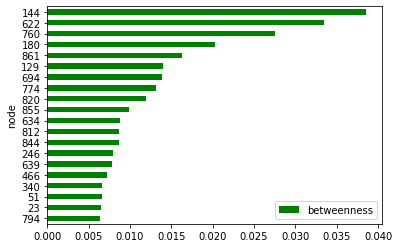

In [44]:
betweenness_df[:20].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

# greedy_modularity_comunities

Find communities in G using greedy modularity maximization.

This function uses Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no futher increase in modularity is possible (a maximum). Two keyword arguments adjust the stopping condition. cutoff is a lower limit on the number of communities so you can stop the process before reaching a maximum (used to save computation time). best_n is an upper limit on the number of communities so you can make the process continue until at most n communities remain even if the maximum modularity occurs for more. To obtain exactly n communities, set both cutoff and best_n to n.

In [45]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(graph)
communities

[frozenset({1,
            2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            12,
            15,
            16,
            17,
            18,
            19,
            20,
            21,
            22,
            28,
            29,
            43,
            49,
            51,
            52,
            53,
            54,
            57,
            63,
            96,
            97,
            98,
            99,
            100,
            101,
            102,
            103,
            104,
            105,
            106,
            107,
            108,
            109,
            110,
            111,
            112,
            138,
            144,
            163,
            164,
            165,
            166,
            167,
            168,
            169,
            170,
            172,
            173,
            174,
            176,
      

In [46]:
modularity_class = {}
for community_number, community in enumerate(communities):
    for name in community:
        modularity_class[name] = community_number
nx.set_node_attributes(graph, modularity_class, 'modularity_class')

## Crear pandas data frame

In [47]:
communities_df = pd.DataFrame(graph.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df

,node,modularity_class
922,922,73
921,921,72
911,911,71
907,907,70
902,902,69
...,...,...
361,361,0
362,362,0
363,363,0
364,364,0


In [48]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
829,829,0
265,265,0
261,261,0
828,828,0
446,446,0
...,...,...
361,361,0
362,362,0
363,363,0
364,364,0


In [49]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
851,851,1
855,855,1
127,127,1
587,587,1
531,531,1
...,...,...
457,457,1
461,461,1
133,133,1
458,458,1


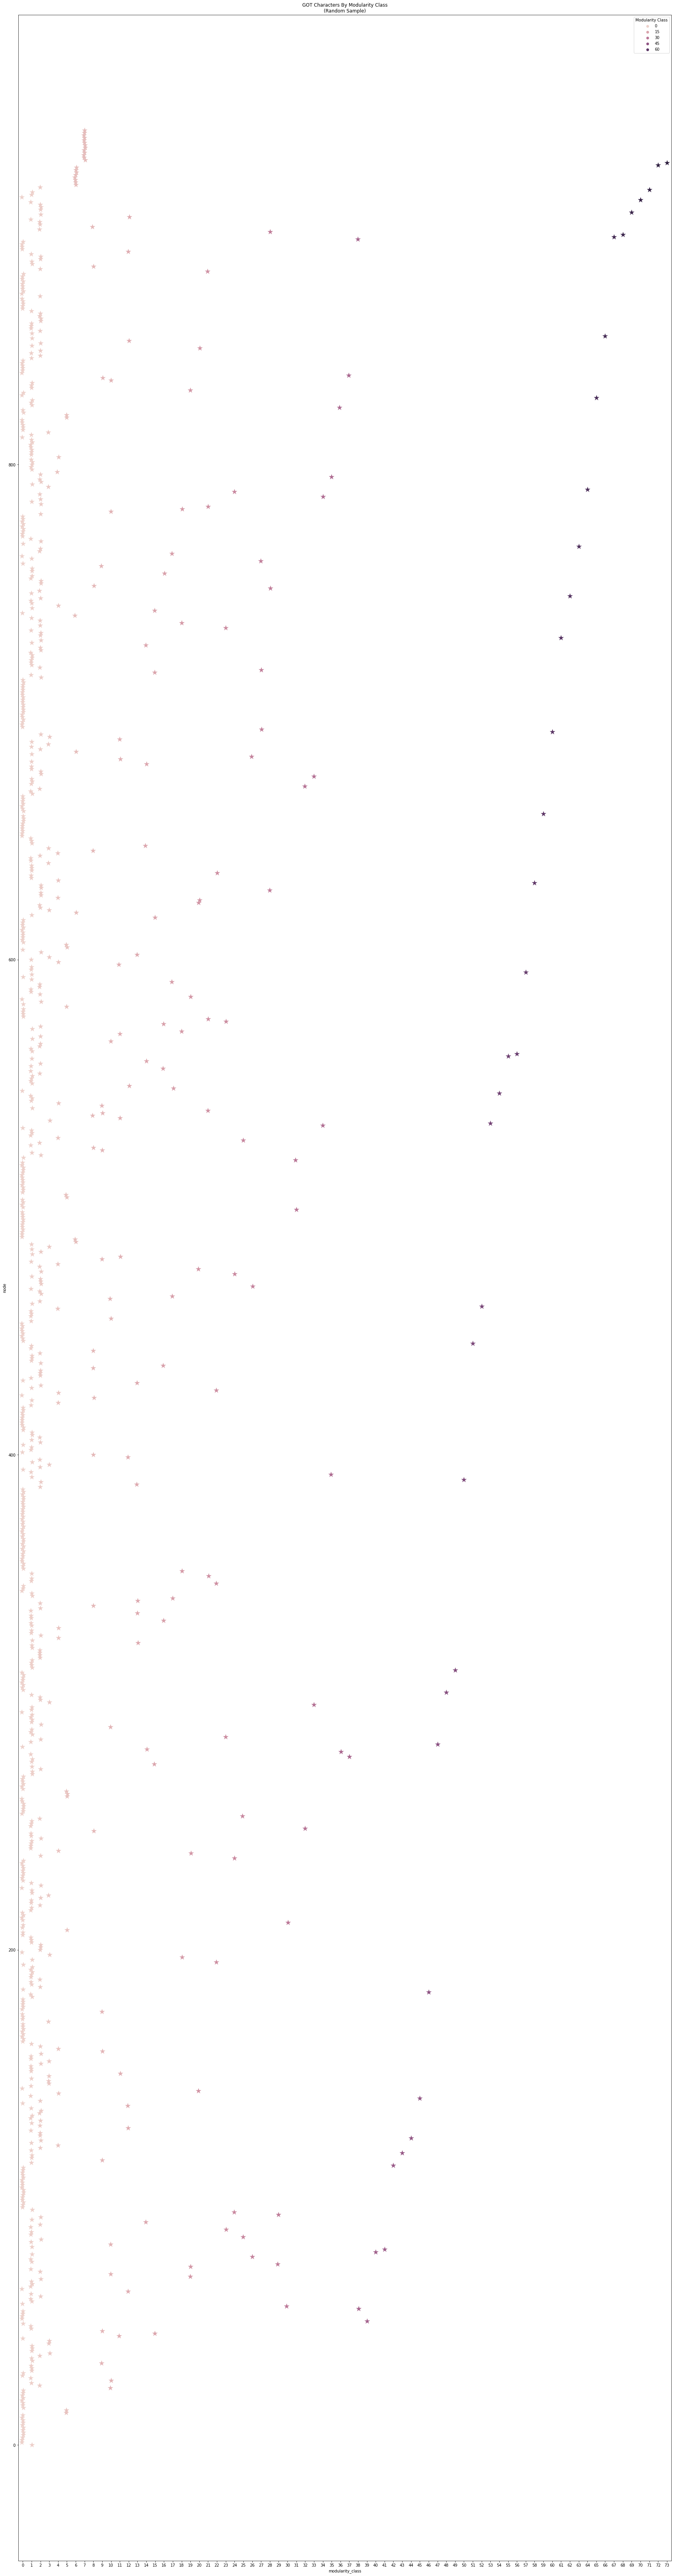

In [50]:
import seaborn as sns

#Set figure size
plt.figure(figsize=(30,120))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()